NAME: SRISHTI BATHAM

SAP ID: 500124490


ENROLLMENT NO.: R2142232748


GITHUB LINK:


SUBMITTED TO: MR. SANTOSH PANDA SIR

In [1]:
#1) Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
#2)Reading of the the data
df = pd.read_csv('diabetes.csv')

In [3]:
#3) Showing basic overview of the data like head, target, or any missing values
print("First 5 records:")
print(df.head())

print("\nDataset Summary:")
print(df.info())

print("\nMissing Values Count:")
print(df.isnull().sum())

print("\nTarget Class Balance:")
print(df['Outcome'].value_counts())

First 5 records:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  

In [4]:
#4) Handling of the missing values if any
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

df.fillna(df.mean(), inplace=True)

In [ ]:
#5) Performing all basic EDA including all types of plots to show relation between features

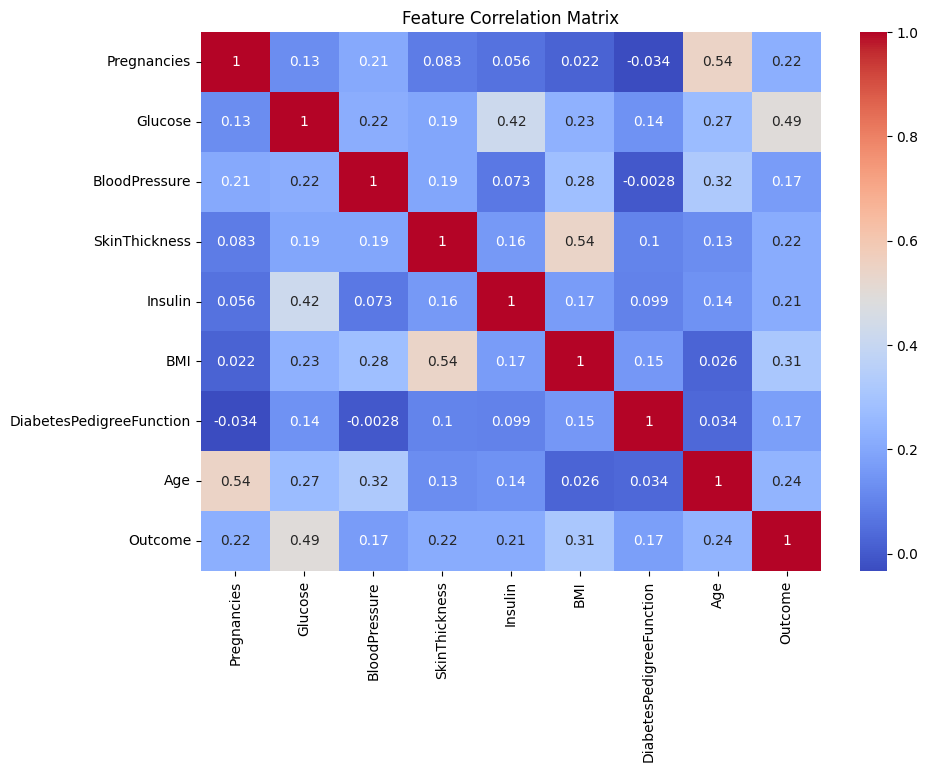

In [6]:
#Correlation Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

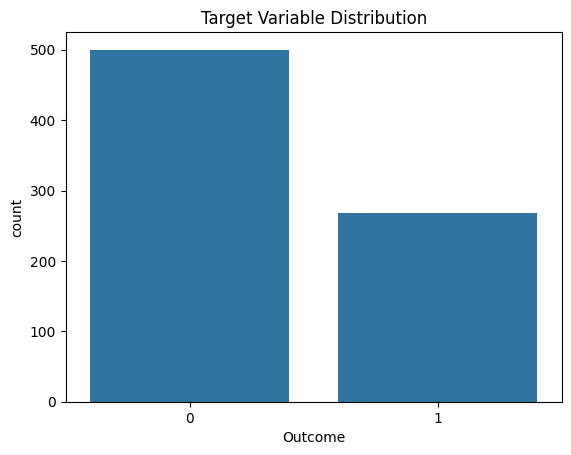

In [7]:
#Outcome Distribution
sns.countplot(x='Outcome', data=df)
plt.title("Target Variable Distribution")
plt.show()

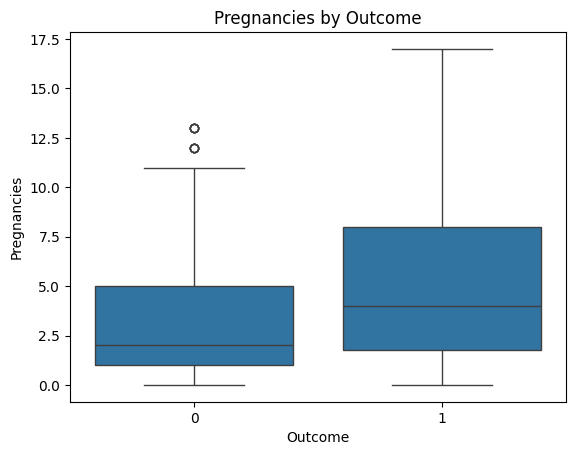

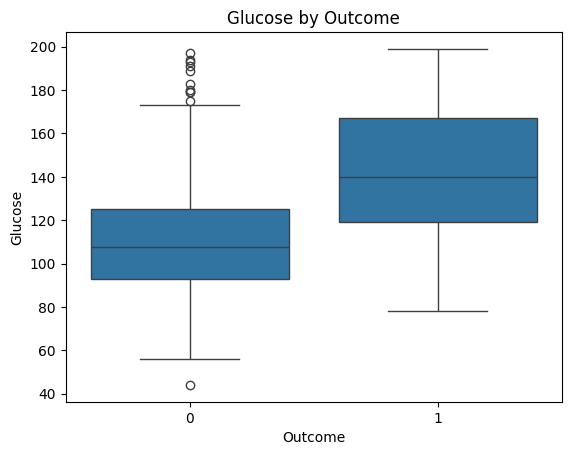

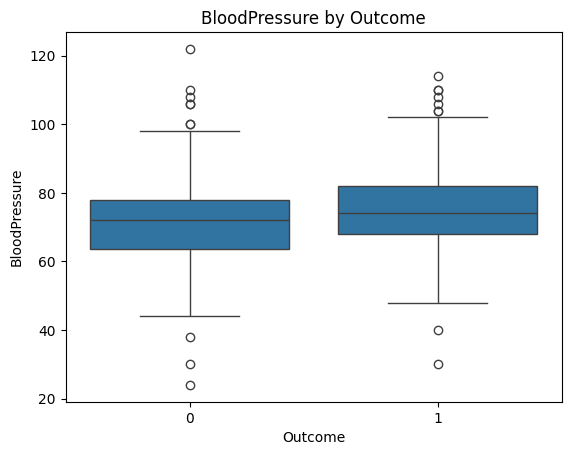

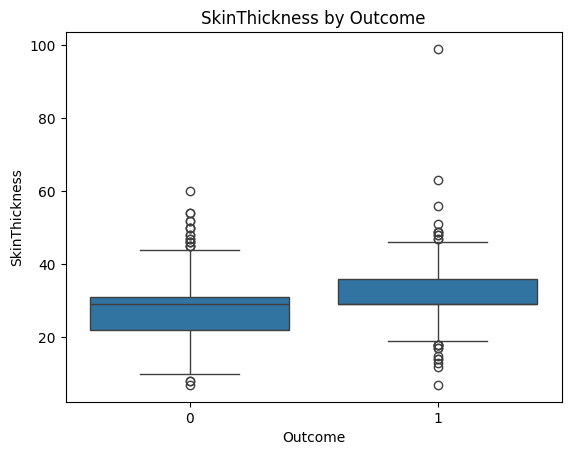

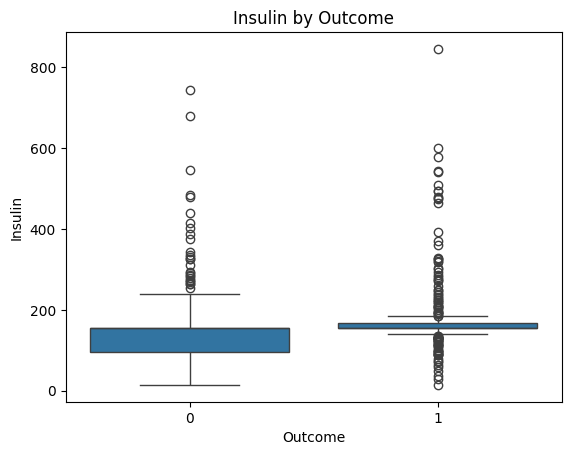

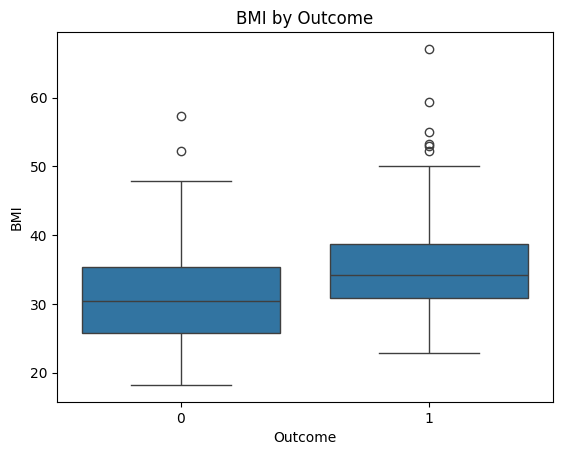

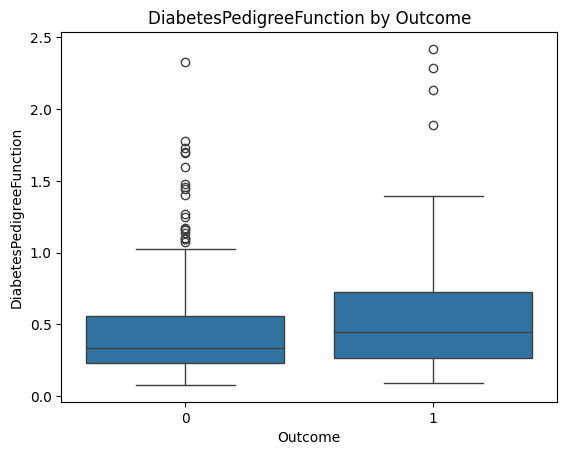

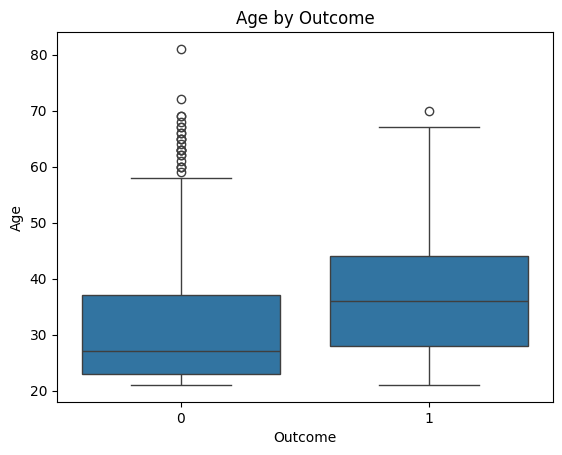

In [8]:
#Boxplots for Feature Comparison
for column in df.columns[:-1]:
    plt.figure()
    sns.boxplot(data=df, x='Outcome', y=column)
    plt.title(f"{column} by Outcome")
    plt.show()

In [9]:
#6) Dividing of the dataset into dependent and independent ( feature selection)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [10]:
#7) Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
#8) Building of the DT
model_gini = DecisionTreeClassifier(random_state=0)
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
#9) Evaluatation of the model
pred_gini = model_gini.predict(X_test)
print("Gini Model Accuracy:", accuracy_score(y_test, pred_gini))

Gini Model Accuracy: 0.6948051948051948


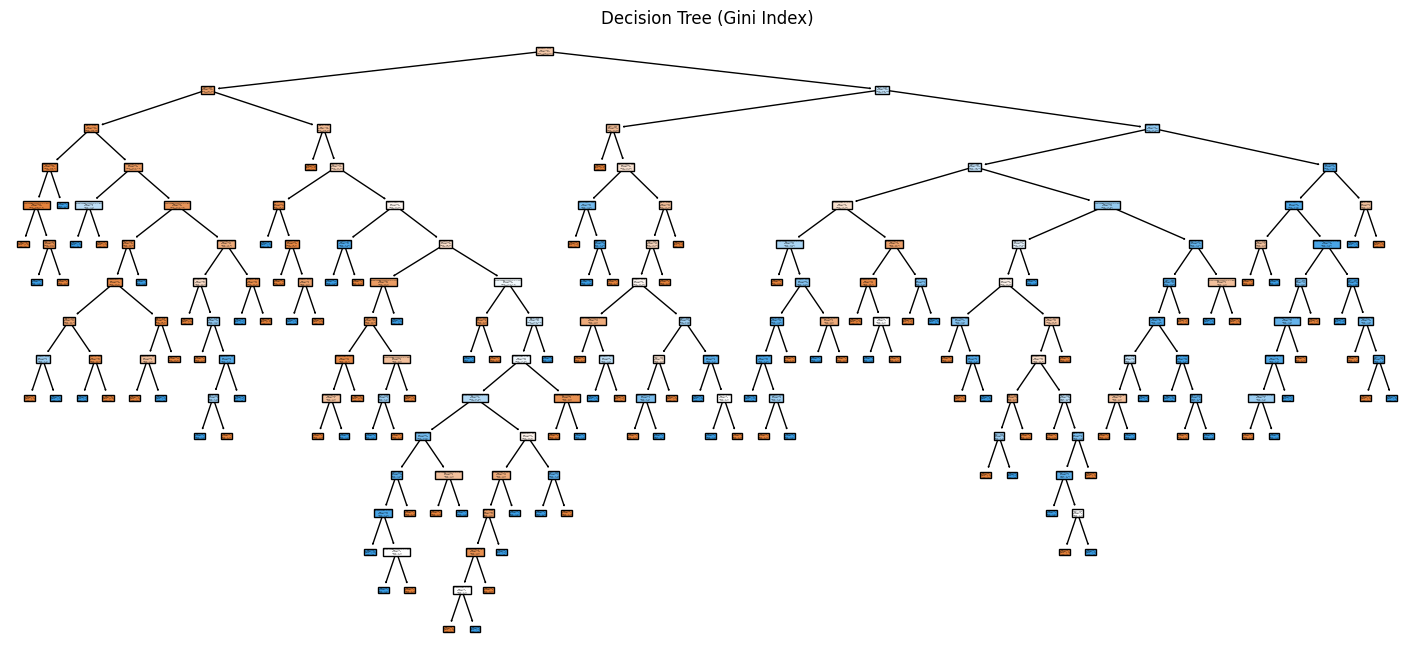

In [13]:
#10) Visualization of the DT
plt.figure(figsize=(18, 8))
plot_tree(model_gini, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (Gini Index)")
plt.show()

In [14]:
#11) Optimization of the DT using other criterion like entropy for Information Gain (default is gini index)
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

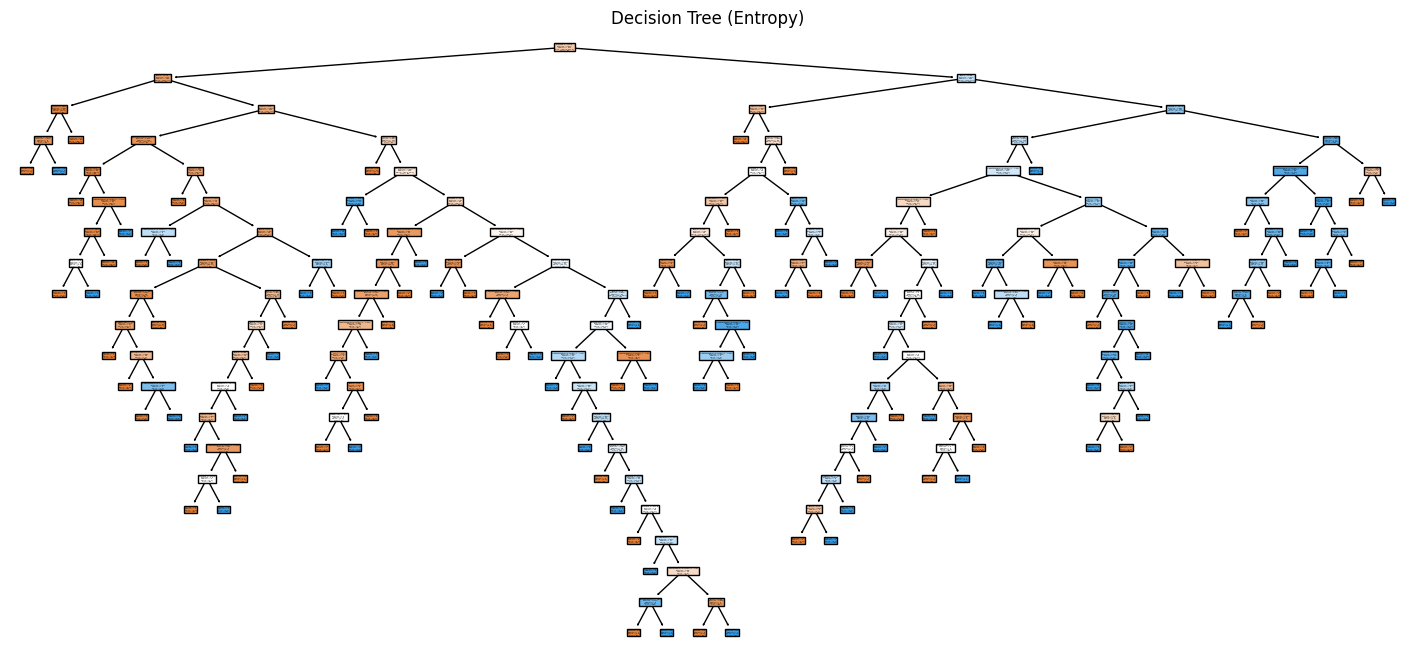

In [15]:
#12) Building and visualization of the DT again using the new criterion
plt.figure(figsize=(18, 8))
plot_tree(model_entropy, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

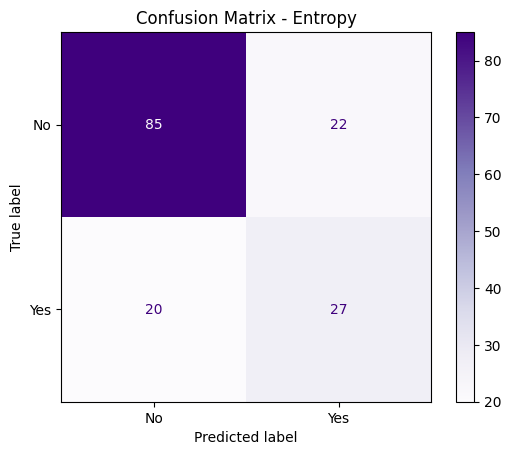


Classification Report - Entropy Model:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       107
           1       0.55      0.57      0.56        47

    accuracy                           0.73       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.73      0.73      0.73       154



In [16]:
#13) Finding the model performance ( plot the confusion matrix and find the precision, recall, and fscore)
entropy_preds = model_entropy.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, entropy_preds)
ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes']).plot(cmap='Purples')
plt.title("Confusion Matrix - Entropy")
plt.show()

# Precision, Recall, F1
print("\nClassification Report - Entropy Model:")
print(classification_report(y_test, entropy_preds))